In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df_banck = pd.read_csv("BankChurners.csv")

In [4]:
df_banck.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
df_banck.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [8]:
# LLAVE PRIMARIA 
len(df_banck["CLIENTNUM"].drop_duplicates().sort_values()) == df_banck.shape[0]

True

# Conclusiones
### -Variables continuas = ['Credit_Limit','Avg_Open_To_Buy','Total_Revolving_Bal','Avg_Utilization_Ratio'] 
### -Variables Discretas = ['Customer_Age', 'Dependent_count', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon']

In [9]:
df_banck.describe(include='O').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [10]:
df_banck["Card_Category"].drop_duplicates() 

0          Blue
6          Gold
7        Silver
443    Platinum
Name: Card_Category, dtype: object

In [11]:
# necesitamos hacer la sustitucion del simbolo +, por la constistencia de los datos (al aprecer es la unica con inconsistencias)
# ademas de realizar otros cambios
df_banck["Income_Category"].drop_duplicates() 

0        $60K - $80K
1     Less than $40K
2       $80K - $120K
5        $40K - $60K
6            $120K +
19           Unknown
Name: Income_Category, dtype: object

In [12]:
df_banck["Income_Category"]=df_banck["Income_Category"].str.replace('$120K +','Greater than 120K',regex=False)

In [13]:
df_banck["Income_Category"]=df_banck["Income_Category"].str.replace('$60K - $80K','60K - 80K',regex=False)

In [14]:
df_banck["Income_Category"]=df_banck["Income_Category"].str.replace('$80K - $120K','80K - 120K',regex=False)

In [15]:
df_banck["Income_Category"]=df_banck["Income_Category"].str.replace('$40K - $60K','40K - 60K',regex=False)

In [16]:
df_banck["Income_Category"]=df_banck["Income_Category"].str.replace('Less than $40K','Less than 40K',regex=False)

In [17]:
df_banck["Income_Category"].drop_duplicates() 

0             60K - 80K
1         Less than 40K
2            80K - 120K
5             40K - 60K
6     Greater than 120K
19              Unknown
Name: Income_Category, dtype: object

# Trate las variables nulas:
### o En caso de que la columna tenga mas del 90% de valores nulos excluir 
### o En caso de que se variable numérica, identifique alguna buena estrateficacion para remplazar los valores nulos por el valor de la mediana 
### o En caso de que sean variables categóricas reemplazar por el valor “others”


In [18]:
df_banck.isnull().sum()/df_banck.shape[0]

CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.0
Income_Category                   

In [19]:
df_banck.loc[df_banck["Marital_Status"].str.contains("Unknown"),["Marital_Status"]] = None

In [20]:
df_banck.loc[df_banck["Income_Category"].str.contains("Unknown"),["Income_Category"]]  = None

In [21]:
df_banck.loc[df_banck["Education_Level"].str.contains("Unknown"),["Education_Level"]] = None

In [22]:
(df_banck.isnull().sum()/df_banck.shape[0])*100

CLIENTNUM                                                                                                                              0.000000
Attrition_Flag                                                                                                                         0.000000
Customer_Age                                                                                                                           0.000000
Gender                                                                                                                                 0.000000
Dependent_count                                                                                                                        0.000000
Education_Level                                                                                                                       14.999506
Marital_Status                                                                                                                         7

In [23]:
df_banck.loc[df_banck["Education_Level"].isnull(),["Education_Level"]] = "others"

In [24]:
df_banck.loc[df_banck["Income_Category"].isnull(),["Income_Category"]] = "others"

In [25]:
df_banck.loc[df_banck["Marital_Status"].isnull(),["Marital_Status"]] = "others"

# -Limpie las variables numéricas:
### o Identifique y explique una buena estratificación de cómo debería de ser analizado los valores numéricos continuos.
### o En caso de que en esas estratificaciones para los valores numéricos continuos hayan valores atípicos, remplazarlos por la media.


In [26]:
df_banck.describe(include='O').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than 40K,3561
Card_Category,10127,4,Blue,9436


In [27]:
df_banck["Attrition_Flag"].value_counts()/df_banck.shape[0]

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [28]:
df_banck["Marital_Status"].value_counts()/df_banck.shape[0]

Married     0.462822
Single      0.389355
others      0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

In [29]:
df_banck["Education_Level"].value_counts()/df_banck.shape[0]

Graduate         0.308877
High School      0.198776
others           0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

In [30]:
df_banck["Income_Category"].value_counts()/df_banck.shape[0]

Less than 40K        0.351634
40K - 60K            0.176755
80K - 120K           0.151575
60K - 80K            0.138442
others               0.109805
Greater than 120K    0.071788
Name: Income_Category, dtype: float64

In [31]:
df_banck["Card_Category"].value_counts()/df_banck.shape[0]

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64

In [32]:
df_banck["Gender"].value_counts()/df_banck.shape[0]

F    0.529081
M    0.470919
Name: Gender, dtype: float64

In [33]:
df_banck["Dependent_count"].value_counts()/df_banck.shape[0]

3    0.269774
2    0.262170
1    0.181495
4    0.155426
0    0.089266
5    0.041868
Name: Dependent_count, dtype: float64

In [36]:
(df_banck["Months_Inactive_12_mon"].value_counts()/df_banck.shape[0])*100

3    37.977683
2    32.408413
1    22.049965
4     4.295448
5     1.757677
6     1.224449
0     0.286363
Name: Months_Inactive_12_mon, dtype: float64

In [85]:
# limpiando agunos datos menores 
df_limpio=df_banck.loc[(df_banck["Months_Inactive_12_mon"]!=0)&(df_banck["Education_Level"]!="Doctorate")&(df_banck["Card_Category"]!="Platinum")&(df_banck["Card_Category"]!="Gold"),:]

# =========================================================================================================================================
## Avg_Open_To_Buy
# =========================================================================================================================================

{'whiskers': [<matplotlib.lines.Line2D at 0x25703bfd400>,
 'caps': [<matplotlib.lines.Line2D at 0x25703bfd9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25703bf1040>],
 'medians': [<matplotlib.lines.Line2D at 0x25703bfdf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x25703c0b250>],
 'means': []}

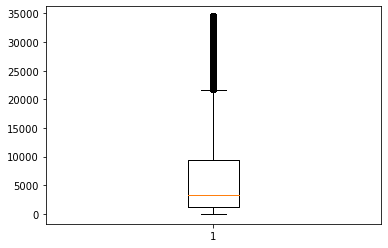

In [86]:
plt.boxplot(df_limpio["Avg_Open_To_Buy"])

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Avg_Open_To_Buy'>

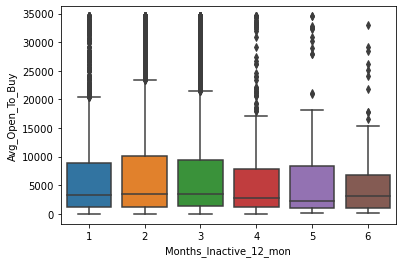

In [87]:
sns.boxplot(data= df_limpio ,x="Months_Inactive_12_mon",y="Avg_Open_To_Buy")

### para segmentar la informacion, tomamos algunas variables, demograficas de los clientes, como la categoria de ingreso, el numeor de dependiente, el nivel de educacion  y su estado civil, de esa manera los clientes los "clasificamos" en diferentes grupos para poder observar el compartamiento de el numero de meses de inactividad y el promedio de la linea de credio abierta en los ultimos 12 meses (Avg_Open_To_Buy), en funcion de estos grupos

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Avg_Open_To_Buy'>

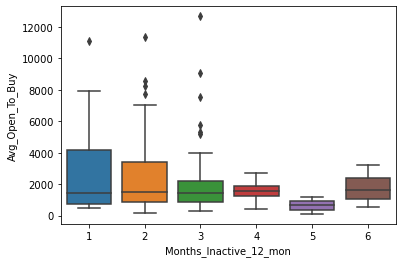

In [143]:

sns.boxplot(data= df_limpio.loc[(df_limpio["Income_Category"]=="Less than 40K")&(df_limpio["Dependent_count"]==3)&(df_limpio["Education_Level"]=="Graduate")&(df_limpio["Marital_Status"]=="Married"),:] ,x="Months_Inactive_12_mon",y="Avg_Open_To_Buy")

In [89]:
dfq1=df_limpio.loc[:,["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy"]].groupby(["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],as_index=False).quantile(0.25)
dfq1.columns=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy_q1"]

In [90]:
dfq3=df_limpio.loc[:,["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy"]].groupby(["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],as_index=False).quantile(0.75)
dfq3.columns=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy_q3"]

In [91]:
dfqmean=df_limpio.loc[:,["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy"]].groupby(["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],as_index=False).mean()
dfqmean.columns=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level","Avg_Open_To_Buy_mean"]

In [92]:
df_iqr=dfq1.merge(dfq3,on=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],how="inner").merge(dfqmean,on=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"],how="inner")

In [93]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["Avg_Open_To_Buy_q3"] - r["Avg_Open_To_Buy_q1"] , axis = 1)

In [94]:
df_iqr["upper_bound_avg"] = df_iqr.apply( lambda r:  r["Avg_Open_To_Buy_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound_avg"] = df_iqr.apply( lambda r:  r["Avg_Open_To_Buy_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [95]:
df_t = df_limpio.merge( df_iqr , on=["Income_Category","Dependent_count","Months_Inactive_12_mon","Marital_Status","Education_Level"] , how="left" ).copy()

In [96]:
def get_real_avg(r):
    if (r["Avg_Open_To_Buy"]<r["lower_bound_avg"]) | (r["Avg_Open_To_Buy"]>r["upper_bound_avg"]):
        return r["Avg_Open_To_Buy_mean"]
    else:
        return r["Avg_Open_To_Buy"]

In [97]:
df_t["n_avg_open_to_buy"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Avg_Open_To_Buy'>

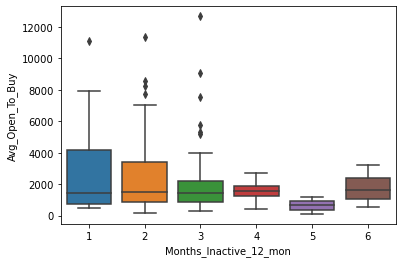

In [98]:

sns.boxplot(data= df_t.loc[(df_t["Income_Category"]=="Less than 40K")&(df_t["Dependent_count"]==3)&(df_t["Marital_Status"]=="Married")&(df_t["Education_Level"]=="Graduate"),:] ,x="Months_Inactive_12_mon",y="Avg_Open_To_Buy")

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='n_avg_open_to_buy'>

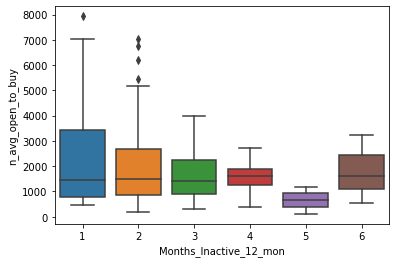

In [99]:

sns.boxplot(data= df_t.loc[(df_t["Income_Category"]=="Less than 40K")&(df_t["Dependent_count"]==3)&(df_t["Marital_Status"]=="Married")&(df_t["Education_Level"]=="Graduate"),:] ,x="Months_Inactive_12_mon",y="n_avg_open_to_buy")

# =========================================================================================================================================
## Credit_Limit
# =========================================================================================================================================

### Estratificamos los clientes en base a su categoria de tarjeta, sus ingresos y la antiguedad del cliente, esto nos pemitira hacer comparaciones en base a la antiguedad e ingresos de un cliente ya que se esperaria que un cliente con mayor antiguedad y ademas tenga ingresos arriba de 120k tenga un limite de credito mayor a diferencia de un cliente que tiene poca antiguedad y ademas sus ingresos son inferiores a 40k 

In [167]:
dfq1 = df_limpio.loc[ : , ["Credit_Limit",'Income_Category','Months_on_book'] ].groupby( ['Income_Category','Months_on_book'] , as_index = False ).quantile(0.25)
dfq1.columns = ['Income_Category','Months_on_book',"Credit_q1"]

In [168]:
dfq3 = df_limpio.loc[ : , ["Credit_Limit",'Income_Category','Months_on_book'] ].groupby( ['Income_Category','Months_on_book'], as_index = False ).quantile(0.75)
dfq3.columns = ['Income_Category','Months_on_book',"Credit_q3"]

In [169]:
dfq2 = df_limpio.loc[ : , ["Credit_Limit",'Income_Category','Months_on_book'] ].groupby(['Income_Category','Months_on_book']  , as_index = False ).mean()
dfq2.columns = ['Income_Category','Months_on_book',"Credit_Mean"]

In [170]:
df_iqr = dfq1.merge( dfq3 , on=['Income_Category','Months_on_book'], how="inner" ).merge( dfq2 , on=['Income_Category','Months_on_book'], how="inner" )

In [171]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["Credit_q3"] - r["Credit_q1"] , axis = 1)

In [172]:
df_iqr["upper"] = df_iqr.apply( lambda r: ( r["Credit_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["Credit_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [173]:
df_t = df_limpio.merge( df_iqr , how="left" , on=['Income_Category','Months_on_book'])

In [175]:
def getRealCredit(r):
    if ( r["Credit_Limit"] <= r["lower"] ) | ( r["Credit_Limit"] >= r["upper"] ):
        return r["Credit_Mean"]
    else:
        return r["Credit_Limit"]

In [176]:
df_t.apply( lambda r: getRealCredit(r) , axis = 1 )

0       12691.000000
1        3680.313514
2        3418.000000
3        3313.000000
4        4716.000000
            ...     
9514     4003.000000
9515     4277.000000
9516     5409.000000
9517     5281.000000
9518     3780.929630
Length: 9519, dtype: float64

In [177]:
df_t["new_Credit_limit"] = df_t.apply( lambda r: getRealPrice(r) , axis = 1 )

<AxesSubplot:xlabel='Months_on_book', ylabel='Credit_Limit'>

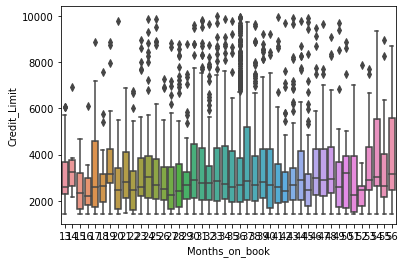

In [180]:
sns.boxplot( data=df_limpio.loc[(df_limpio['Card_Category']=='Blue')  & (df_limpio['Income_Category']=='Less than 40K')  ,:]  , x="Months_on_book" , y="Credit_Limit" )

<AxesSubplot:xlabel='Months_on_book', ylabel='new_Credit_limit'>

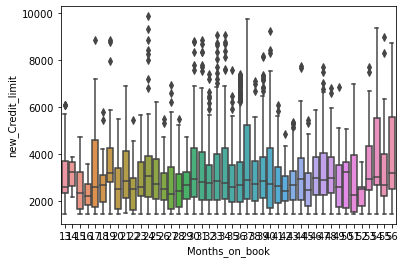

In [181]:
sns.boxplot( data=df_t.loc[(df_t['Card_Category']=='Blue')  & (df_t['Income_Category']=='Less than 40K')  ,:]  , x="Months_on_book" , y="new_Credit_limit" )

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

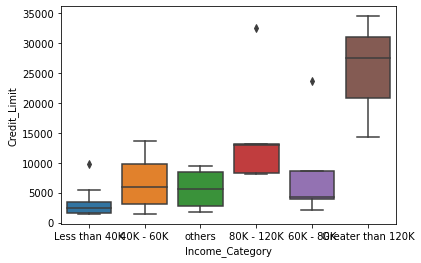

In [182]:
sns.boxplot( data=df_limpio.loc[(dfbank1['Card_Category']=='Blue')  & (df_limpio['Months_on_book']==20)  ,:]  , x="Income_Category" , y="Credit_Limit" )

<AxesSubplot:xlabel='Income_Category', ylabel='new_Credit_limit'>

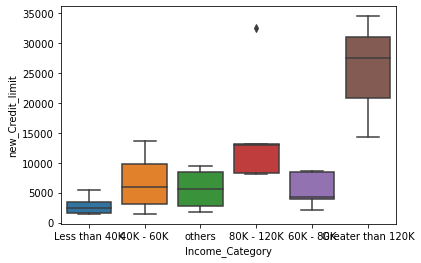

In [183]:
sns.boxplot( data=df_t.loc[(df_t['Card_Category']=='Blue')  & (df_t['Months_on_book']==20)  ,:]  , x="Income_Category" , y="new_Credit_limit" )

# =========================================================================================================================================
## total_Tans_Amt
## esta variable contiene demaciados valores repetidos por lo que no va a ser tratada como, una variable continua 
# =========================================================================================================================================

In [68]:
len(df_limpio["Total_Trans_Amt"].value_counts())/df_banck.shape[0]

0.467858200849215

# =========================================================================================================================================
## Avg_Utilization_Ratio
##  
# =========================================================================================================================================

In [69]:
df_limpio.loc[:,["Avg_Utilization_Ratio"]].describe()

,Avg_Utilization_Ratio
count,9123.000000
mean,0.279051
std,0.276915
min,0.000000
25%,0.023000
50%,0.183000
75%,0.510000
max,0.999000


{'whiskers': [<matplotlib.lines.Line2D at 0x2570380e550>,
 'caps': [<matplotlib.lines.Line2D at 0x2570380eb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2570380e280>],
 'medians': [<matplotlib.lines.Line2D at 0x25703816100>],
 'fliers': [<matplotlib.lines.Line2D at 0x257038163d0>],
 'means': []}

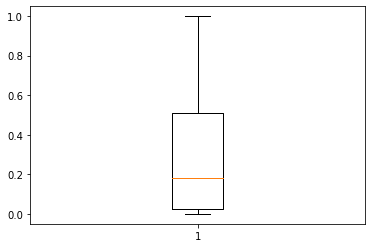

In [70]:
plt.boxplot(df_limpio.loc[:,["Avg_Utilization_Ratio"]])

### Estratificamos esta variable por el periodo de relacion de los clientes("Months_on_book"), y lo filtramos por la categoria de ingresos anuales de cada cliente ("Income_Category")

<AxesSubplot:xlabel='Months_on_book', ylabel='Avg_Utilization_Ratio'>

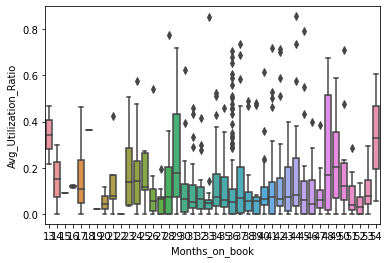

In [284]:
sns.boxplot(data=df_limpio.loc[(df_limpio["Income_Category"]=="Greater than 120K"),:], x="Months_on_book",y="Avg_Utilization_Ratio")

### para lograr segmentar mas la informacion, agregamos otra variable demografica, como es el nivel de educacion (Education_Level) y los valores empiezan a desaparecer

<AxesSubplot:xlabel='Months_on_book', ylabel='Avg_Utilization_Ratio'>

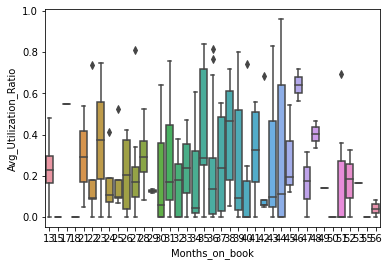

In [279]:
sns.boxplot(data=df_limpio.loc[(df_limpio["Education_Level"]=="High School")&(df_limpio["Income_Category"]=="others"),:], x="Months_on_book",y="Avg_Utilization_Ratio")

In [265]:
dfq1=df_limpio.loc[:,["Education_Level","Income_Category","Months_on_book","Avg_Utilization_Ratio"]].groupby(["Education_Level","Income_Category","Months_on_book"],as_index=False).quantile(0.25)
dfq1.columns = ['Education_Level', 'Income_Category', 'Months_on_book','Avg_Utilization_Ratio_q1']

In [266]:
dfq3=df_limpio.loc[:,["Education_Level","Income_Category","Months_on_book","Avg_Utilization_Ratio"]].groupby(["Education_Level","Income_Category","Months_on_book"],as_index=False).quantile(0.75)
dfq3.columns = ['Education_Level', 'Income_Category', 'Months_on_book','Avg_Utilization_Ratio_q3']

In [267]:
dfqmean=df_limpio.loc[:,["Education_Level","Income_Category","Months_on_book","Avg_Utilization_Ratio"]].groupby(["Education_Level","Income_Category","Months_on_book"],as_index=False).mean()
dfqmean.columns = ['Education_Level', 'Income_Category', 'Months_on_book','Avg_Utilization_Ratio_mean']

In [268]:
df_iqr = dfq1.merge( dfq3 , on=["Education_Level","Income_Category","Months_on_book"], how="inner" ).merge( dfqmean , on=["Education_Level","Income_Category","Months_on_book"], how="inner" )

In [269]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["Avg_Utilization_Ratio_q3"] - r['Avg_Utilization_Ratio_q1'] , axis = 1)

In [270]:
df_iqr["upper_avg"] = df_iqr.apply( lambda r: ( r["Avg_Utilization_Ratio_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_avg"] = df_iqr.apply( lambda r: ( r["Avg_Utilization_Ratio_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [272]:
df_t = df_limpio.merge( df_iqr , how="left" , on=["Education_Level","Income_Category","Months_on_book"])

In [273]:
def get_real_avg(r):
    if ( r["Avg_Utilization_Ratio"] <= r["lower_avg"] ) | ( r["Avg_Utilization_Ratio"] >= r["upper_avg"] ):
        return r["Avg_Utilization_Ratio_mean"]
    else:
        return r["Avg_Utilization_Ratio"]

In [274]:
df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

0       0.061
1       0.105
2       0.000
3       0.760
4       0.000
        ...  
9514    0.462
9515    0.511
9516    0.000
9517    0.000
9518    0.189
Length: 9519, dtype: float64

In [276]:
df_t["n_avg_utilization_ratio"] = df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='Months_on_book', ylabel='Avg_Utilization_Ratio'>

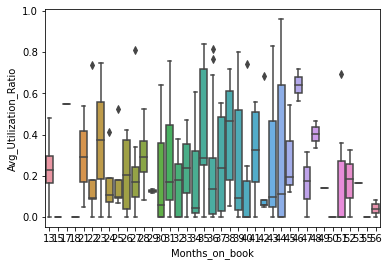

In [281]:
sns.boxplot(data=df_t.loc[(df_t["Education_Level"]=="High School")&(df_t["Income_Category"]=="others"),:], x="Months_on_book",y="Avg_Utilization_Ratio")

<AxesSubplot:xlabel='Months_on_book', ylabel='n_avg_utilization_ratio'>

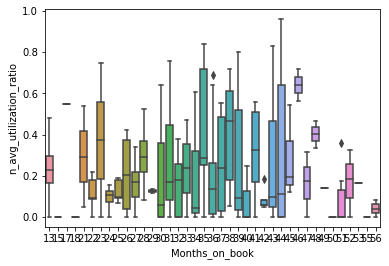

In [280]:
sns.boxplot(data=df_t.loc[(df_t["Education_Level"]=="High School")&(df_t["Income_Category"]=="others"),:], x="Months_on_book",y="n_avg_utilization_ratio")

# de esta forma podemos observar mejor la relacion que hay entre el periodo de relacion con el banco con el promedio de utilizacion del credito

# =========================================================================================================================================
## Total_Revolving_Bal
##
# =========================================================================================================================================

{'whiskers': [<matplotlib.lines.Line2D at 0x257051e7100>,
 'caps': [<matplotlib.lines.Line2D at 0x257051e76a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257051dadf0>],
 'medians': [<matplotlib.lines.Line2D at 0x257051e7c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x257051e7f40>],
 'means': []}

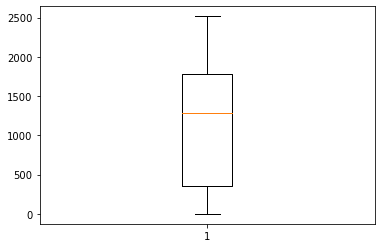

In [144]:
plt.boxplot(df_limpio.loc[:,["Total_Revolving_Bal"]])

# -Limpie las variables categóricas
### o Según las técnicas de tratamiento de limpieza de valores continuos limpie y transforme las variables categóricas
### o Dejar en CSVs las traducciones o reglas que genera de las variables categóricas.


In [198]:
dfbank1=df_limpio.copy()

In [199]:
dfbank1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [200]:
categoricals =['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
                'Education_Level', 'Marital_Status','Income_Category', 'Card_Category',]

In [201]:
dfbank2=dfbank1.loc[:, categoricals]

### Vamos a eliminar las columnas donde los niveles distintos de las variables categoricas representan mas del 0.95

In [202]:
target = .95

columnas_Validas = []
columnas_con_muchos_niveles = []
columnas_con_1_nivel = []

for columns in categoricals:
    x = dfbank2.loc[ : , [columns] ].drop_duplicates()
    uniquevalues = x.shape[0]
    
    if uniquevalues == 1:
        columnas_con_1_nivel.append(columns)
    elif (uniquevalues / dfbank2.shape[0]) > target:
        columnas_con_muchos_niveles.append(columns)
    else:
        columnas_Validas.append(columns)
    

#### Para las columnas categóricas vamos encontrar aquellas columnas que tienen mas de un nivel,y que por lo menos uno de esos niveles represente mas o igual del 90%. si se cumple eliminaremos las columnas

In [203]:
target=0.95
y=pd.DataFrame()
Columns_out= []
for c_ in columnas_Validas:
    x = dfbank2.loc[ : , [c_] ].drop_duplicates()
    uniquevalues = x.shape[0]
    y = dfbank2[c_].value_counts()/dfbank2.shape[0]
    Porcentaje=y.values[0]
    if (uniquevalues > 1 and Porcentaje>=target) :
        Columns_out.append(c_)
        valid_columns.remove(c_)
   

#### Para las columnas categóricas encontraremos aquellas columnas que tengan entre 2-6 niveles. A los niveles con la frecuencia mas baja lo vamos a remplazar por la palabra Others 

In [204]:
valid_columns_two_fourlevels = []
for c_ in categoricals:
    x = dfbank2.loc[ : , [c_] ].drop_duplicates()
    uniquevalues = x.shape[0]
    
    if uniquevalues >=3 and uniquevalues <=6:
        valid_columns_two_fourlevels.append(c_)

In [205]:
valid_columns_two_fourlevels

['Education_Level', 'Marital_Status', 'Income_Category']

### traducciones de variable Education Level

In [206]:
level_frequency=pd.DataFrame()

In [207]:
level_frequency['Numero_Datos']= dfbank2['Education_Level'].value_counts()

In [208]:
level_frequency=level_frequency.reset_index()

In [209]:
level_frequency.columns=('Education_Level','Numero_Datos')

In [210]:
level_frequency['Porcentaje']=level_frequency['Numero_Datos']/dfbank2.shape[0]

In [211]:
level_frequency=level_frequency.sort_values(['Porcentaje'], ascending=False)

In [212]:
level_frequency['nEducation_Level']='Others'

In [213]:
Valor_minimo=0.208023

In [214]:
level_frequency['nEducation_Level']=level_frequency.apply( lambda r: r["Education_Level"] if r["Porcentaje"] >= Valor_minimo else r["nEducation_Level"] , axis = 1 )

In [215]:
level_frequency_Education=level_frequency.loc[:, ['Education_Level','nEducation_Level']]

In [216]:
level_frequency_Education.to_csv('nEducation_level.csv')

### traducciones de variable Marital Status

In [217]:
level_frequency=pd.DataFrame()

In [218]:
level_frequency['Numero_Datos']= dfbank2['Marital_Status'].value_counts()

In [219]:
level_frequency=level_frequency.reset_index()

In [220]:
level_frequency.columns=('Marital_Status','Numero_Datos')

In [221]:
level_frequency['Porcentaje']=level_frequency['Numero_Datos']/dfbank2.shape[0]

In [222]:
level_frequency=level_frequency.sort_values(['Porcentaje'], ascending=False)

In [223]:
level_frequency['nMarital_Status']='Others'

In [224]:
Valor_minimo=level_frequency['Porcentaje'][1]

In [225]:
level_frequency['nMarital_Status']=level_frequency.apply( lambda r: r["Marital_Status"] if r["Porcentaje"] >= Valor_minimo else r["nMarital_Status"] , axis = 1 )

In [226]:
level_frequency_Marital_Status=level_frequency.loc[:, ['Marital_Status','nMarital_Status']]

In [227]:
level_frequency_Marital_Status.to_csv('nMarital_Status.csv')

### traducciones de variable Income_Category

In [228]:
level_frequency=pd.DataFrame()

In [229]:
level_frequency['Numero_Datos']= dfbank2['Income_Category'].value_counts()

In [230]:
level_frequency=level_frequency.reset_index()

In [231]:
level_frequency.columns=('Income_Category','Numero_Datos')

In [232]:
level_frequency['Porcentaje']=level_frequency['Numero_Datos']/dfbank2.shape[0]

In [233]:
level_frequency=level_frequency.sort_values(['Porcentaje'], ascending=False)

In [234]:
level_frequency['nIncome_Category']='Others'

In [235]:
Valor_minimo=level_frequency['Porcentaje'][2]

In [236]:
level_frequency['nIncome_Category']=level_frequency.apply( lambda r: r["Income_Category"] if r["Porcentaje"] >= Valor_minimo else r["nIncome_Category"] , axis = 1 )

In [237]:
level_frequency_Income_Category=level_frequency.loc[:, ['Income_Category','nIncome_Category']]

In [238]:
level_frequency_Income_Category.to_csv('Income_Category_Status.csv')